In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
import patsy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
%matplotlib inline


In [37]:
np.random.seed(1)
#Uncomment and set the path to the csv file below
#file_path_jump = r'D:\visual studio code\project\EEN210-main\EEN210-main\repeated_jumping_20240205_155636.csv'
file_path_updown =r'D:\visual studio code\project\EEN210-main\EEN210-main\sitting up and down 2min.csv'
file_path_walk=r'D:\visual studio code\project\EEN210-main\EEN210-main\walk_2min_data_20240212_154122.csv'
file_path_fall=r'D:\visual studio code\project\EEN210-main\EEN210-main\5bagtoss_20240211_203142.csv'


walk_data = pd.read_csv(file_path_walk)
updown_data = pd.read_csv(file_path_updown)
#stand_data=pd.read_csv(file_path_stand)
fall_data=pd.read_csv(file_path_fall)

walk_data["label"]=0
updown_data["label"]=1
fall_data["label"]=2
updown_data.head(100)


,acceleration_x,acceleration_y,acceleration_z,gyroscope_x,gyroscope_y,gyroscope_z,timestamp,label
0,-0.8142,-0.1233,-0.0125,3.5095,-6.8665,-2.0370,2024-02-12 15:49:19.455,1
1,-0.8208,-0.1052,-0.0088,6.0196,-8.7204,-3.0060,2024-02-12 15:49:19.455,1
2,-0.8091,-0.0869,-0.0156,7.8964,-10.4675,-3.7079,2024-02-12 15:49:19.479,1
3,-0.8081,-0.0840,-0.0071,8.1787,-8.5449,-4.3106,2024-02-12 15:49:19.495,1
4,-0.8096,-0.0718,-0.0176,7.3242,-1.0223,-5.5161,2024-02-12 15:49:19.511,1
...,...,...,...,...,...,...,...,...
95,-0.7458,-0.1482,0.0122,-12.3215,38.1546,-28.6942,2024-02-12 15:49:21.167,1
96,-0.9395,-0.1025,0.1331,-4.7455,28.0228,-32.7148,2024-02-12 15:49:21.191,1
97,-0.9331,-0.1370,0.0298,0.7858,8.7280,-20.8969,2024-02-12 15:49:21.207,1
98,-0.7339,-0.1987,-0.0046,-0.9308,4.7531,-9.0637,2024-02-12 15:49:21.231,1


In [38]:
columns = [
        "acceleration_x",
        "acceleration_y",
        "acceleration_z",
        "gyroscope_x",
        "gyroscope_y",
        "gyroscope_z",
    ]

data = pd.concat([walk_data, updown_data, fall_data])

# Preprocess the data
X = data.drop(['timestamp', 'label'], axis=1)  # Features
y = data['label']  # Target labels

# Convert the DataFrame to numpy arrays


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#print(X_train[0])
normalizer = StandardScaler()

X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)
print(X_train[0])

[-0.25062482  0.09098766  0.58453704 -1.27310754  0.78888969  0.39777123]


In [40]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 25, class_weight="balanced")
# Fitting model
model.fit(X_train, y_train)
pred = model.predict(X_test)

#Model accuracy
acc = accuracy_score(y_test, pred)*100
print('accuracy_score',acc)

# Classification Report
print('Classification Report')
print(classification_report(y_test, pred))


accuracy_score 95.08521601268332
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1863
           1       0.96      0.96      0.96      2071
           2       0.98      0.94      0.96      1112

    accuracy                           0.95      5046
   macro avg       0.96      0.95      0.95      5046
weighted avg       0.95      0.95      0.95      5046



In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve
import matplotlib.pyplot as plt

# Assuming you've already prepared your data X_train, X_test, y_train, y_test

# Preprocess the data
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=25, class_weight="balanced")
rf_classifier.fit(X_train,y_train)

# Create OneVsRestClassifier
#ovr_classifier = OneVsRestClassifier(rf_classifier)

# Fit the model
#ovr_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict_proba(X_test)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
#plot_roc_curve(rf_classifier, X_test, y_pred)
#plt.show()


ROC AUC Score: 0.9937820112457462


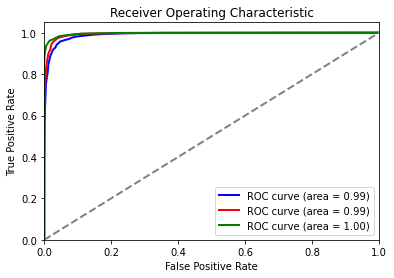

In [10]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve, auc


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # Assuming you have 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
lw = 2
colors = ['blue', 'red', 'green']  # Colors for each class
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve (area = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [11]:
from sklearn.model_selection import cross_val_score, train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=25, class_weight="balanced")
rf_classifier.fit(X_train,y_train)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Cross-validation scores: [0.95031847 0.94734607 0.94989384 0.94904459 0.94562447]
Mean cross-validation score: 0.9484454882776211


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)

#Model accuracy
acc = accuracy_score(y_test, dt_pred)*100
print('accuracy_score',acc)

# Classification Report
print('Classification Report')
print(classification_report(y_test, dt_pred))


Cross-validation scores: [0.91974522 0.91592357 0.91549894 0.91125265 0.91461342]
Mean cross-validation score: 0.9154067612249646
accuracy_score 92.2116527942925
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1835
           1       0.94      0.93      0.93      2131
           2       0.94      0.94      0.94      1080

    accuracy                           0.92      5046
   macro avg       0.92      0.92      0.92      5046
weighted avg       0.92      0.92      0.92      5046



In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier()

# Fit the model
gb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = gb_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9431232659532303
Precision: 0.9433291575857516
Recall: 0.9431232659532303
F1-score: 0.9430575036981231


In [41]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 output classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions
y_pred_probs = model.predict(X_test)
y_pred = tf.argmax(y_pred_probs, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


ModuleNotFoundError: No module named 'tensorflow'

In [42]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Define the neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.softmax(out)
        return out

# Function to train the model
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss}")

# Function to evaluate the model
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    print(f"Accuracy on test set: {accuracy}")

# Load your data and preprocess it

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#print(X_train[0])
normalizer = StandardScaler()

X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

#Create DataLoader objects
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define hyperparameters
input_size = X_train.shape[1]
hidden_size = 64
num_classes = len(np.unique(y_train))
learning_rate = 0.001
num_epochs = 10

# Create the neural network model
model_NN = NeuralNetwork(input_size, hidden_size, num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_NN.parameters(), lr=learning_rate)

# Train the model
train_model(model_NN, train_loader, criterion, optimizer, num_epochs)

# Evaluate the model
evaluate_model(model_NN, test_loader)


Epoch [1/10], Loss: 170.5889751315117
Epoch [2/10], Loss: 136.07326459884644
Epoch [3/10], Loss: 125.5069934129715
Epoch [4/10], Loss: 121.77771800756454
Epoch [5/10], Loss: 119.99202877283096
Epoch [6/10], Loss: 118.8799352645874
Epoch [7/10], Loss: 118.11589056253433
Epoch [8/10], Loss: 117.54746544361115
Epoch [9/10], Loss: 117.09511238336563
Epoch [10/10], Loss: 116.74123787879944
Accuracy on test set: 0.9223147047166073


In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Define the LSTM model
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Function to train the LSTM model
def train_lstm_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss}")

# Function to evaluate the LSTM model
def evaluate_lstm_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    print(f"Accuracy on test set: {accuracy}")

# Load your data and preprocess it
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)  # Assuming y is a pandas Series
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Create DataLoader objects
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# Define hyperparameters
input_size = 6 # Example input size
hidden_size = 64
num_layers = 2
num_classes = 3 # Example number of classes
learning_rate = 0.001
num_epochs = 10

# Create the LSTM model
model_lstm = LSTMClassifier(input_size, hidden_size, num_layers, num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_lstm.parameters(), lr=learning_rate)

# Train the LSTM model
train_lstm_model(model_lstm, train_loader, criterion, optimizer, num_epochs)

# Evaluate the LSTM model
evaluate_lstm_model(model_lstm, test_loader)


RuntimeError: input must have 3 dimensions, got 2

In [35]:
import joblib

def save_model(model, filename):
    try:
        joblib.dump(model, filename)
        print("Model saved successfully.")
    except Exception as e:
        print("Error saving model:", e)

def load_model(filename):
    try:
        model = joblib.load(filename)
        print("Model loaded successfully.")
        return model
    except Exception as e:
        print("Error loading model:", e)
        return None

def train_model(method, X_train, y_train):
    if method == 'RandomForest':
        model = RandomForestClassifier(n_estimators = 25, class_weight="balanced")
    elif method == 'DecisionTree':
        model = DecisionTreeClassifier()
    elif method == 'SVM':
        model = SVC()
    elif method =='GradientBoost':
        model== GradientBoostingClassifier()
    else:
        raise ValueError("Invalid machine learning method specified.")
    
    try:
        model.fit(X_train, y_train)
        return model
    except Exception as e:
        print("Error training model:", e)
        return None

def predict_label(model, data):
    try:
        label = model.predict(data)
        return label
    except Exception as e:
        print("Error predicting label:", e)
        return None

def predict_label_NN(model, data):
    try:
        # Convert data to tensor
        data_tensor = torch.tensor(data.values, dtype=torch.float32)
        
        # Make predictions using the model
        with torch.no_grad():
            outputs = model(data_tensor)
            _, predicted = torch.max(outputs, 1)
        
        return predicted.numpy()  # Convert predictions to numpy array
    except Exception as e:
        print("Error predicting label:", e)
        return None

def calculate_accuracy(true_labels, predicted_labels):
    # Count the occurrences of the target label in the true labels
    correct_target_labels = np.sum(predicted_labels==true_labels)
    print(correct_target_labels)
    
    # Count the occurrences of the target label in the predicted labels
    #correct_predicted_labels = sum((true_labels == target_label) & (predicted_labels == target_label))
    
    # Calculate the accuracy
    if correct_target_labels > 0:
        accuracy = (correct_target_labels / len(predicted_labels)) * 100
    else:
        accuracy = 0
    
    return accuracy



# Example usage:
# Train the model
# model = train_model()
method = 'RandomForest'

trained_model = train_model(method, X_train, y_train)

# Save the trained model
save_model(trained_model, "model.pkl")

# Load the trained model
loaded_model = load_model("model.pkl")

# Example prediction
file_path=r'D:\visual studio code\project\EEN210-main\EEN210-main\fall_on_back_data_20240211_195608.csv'

#file_path_jump = r'D:\visual studio code\project\EEN210-main\EEN210-main\repeated_jumping_20240205_155636.csv'
file_path_updown =r'D:\visual studio code\project\EEN210-main\EEN210-main\sitting up and down 2min.csv'
#file_path_stand=r'D:\visual studio code\project\EEN210-main\EEN210-main\standing_20240205_155041.csv'

target_label = 0
data = pd.read_csv(file_path_updown)
X = data.drop(['timestamp', 'label'], axis=1)  # Features
y = data['label']
#np.set_printoptions(threshold=np.inf) 
np.set_printoptions(threshold=20) 
# data = ... # Load or generate your data here
label = predict_label(loaded_model, X)
print("Predicted label:", label)
accuracy_label = calculate_accuracy(target_label, label)
print(f"Accuracy for label {target_label}: {accuracy_label:.2f}%")
# Save the trained model
save_model(model_NN, "model_NN.pkl")

# Load the trained model
loaded_model = load_model("model_NN.pkl")
label = predict_label_NN(loaded_model, X)
print("Predicted label:", label)
# Calculate the accuracy for label 2
accuracy_label = calculate_accuracy(target_label, label)
print(f"Accuracy for label {target_label}: {accuracy_label:.2f}%")

Model saved successfully.
Model loaded successfully.
Predicted label: [0 0 0 ... 0 0 0]
6443
Accuracy for label 0: 92.31%
Model saved successfully.
Model loaded successfully.
Predicted label: [0 0 0 ... 0 0 0]
6110
Accuracy for label 0: 87.54%
